## Predicting Avocado Prices Using Facebook Prophet

- Data represents weekly 2018 retail scan data for National retail volume (units) and price.
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.  
  
Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from prophet import Prophet

In [17]:
avocado_df = pd.read_csv('./archive/avocado.csv')

In [18]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [19]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [20]:
avocado_df.tail()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'L

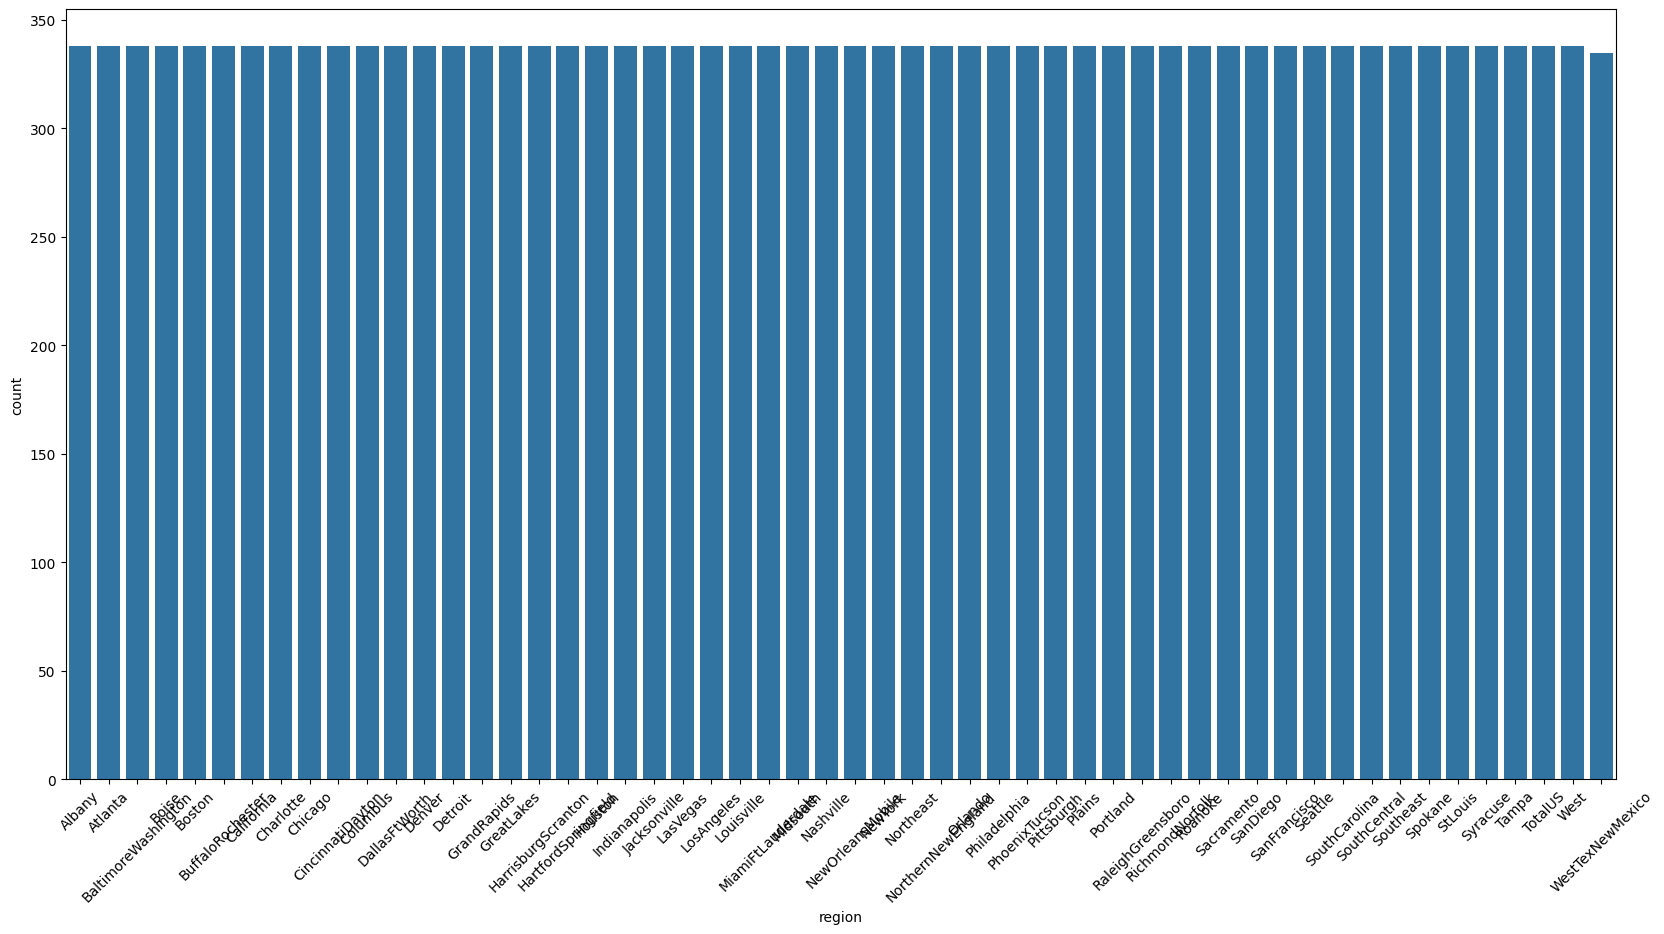

In [21]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)

Data Balanced on region

<Axes: xlabel='year', ylabel='count'>

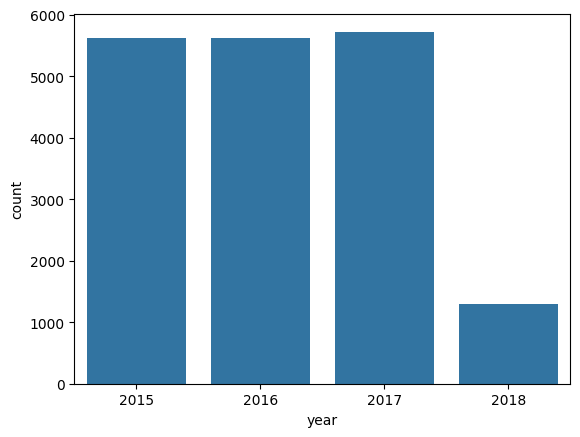

In [22]:
sns.countplot(x = 'year', data = avocado_df)

In [23]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]

In [24]:
avocado_prophet_df

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


## Make Predictions

In [27]:
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date' : 'ds', 'AveragePrice' : 'y'})
avocado_prophet_df

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


In [28]:
m  = Prophet()
m.fit(avocado_prophet_df)

18:29:15 - cmdstanpy - INFO - Chain [1] start processing
18:29:22 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 2000x1000 with 0 Axes>

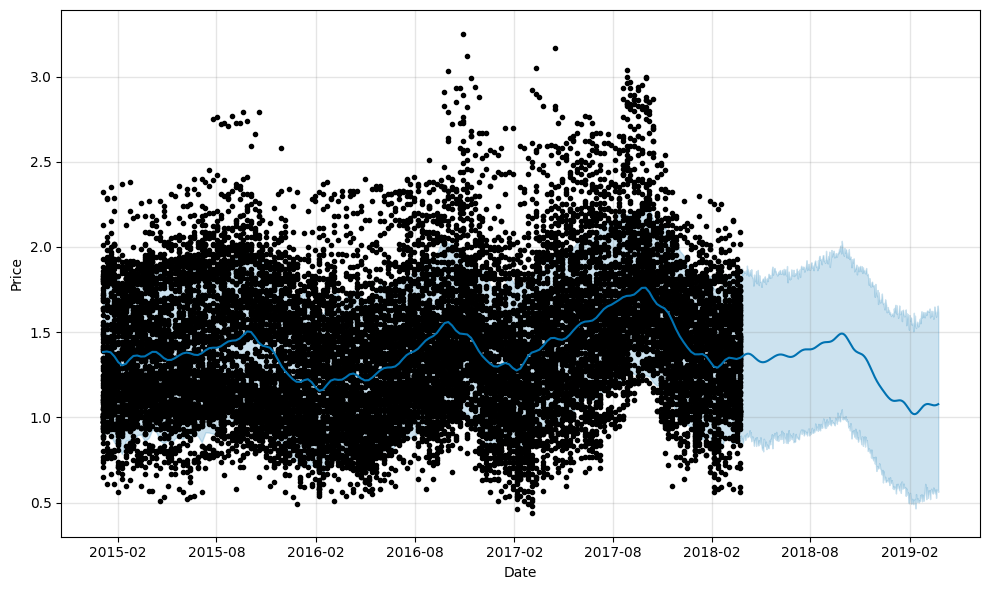

In [30]:
plt.figure(figsize=(20,10))
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects

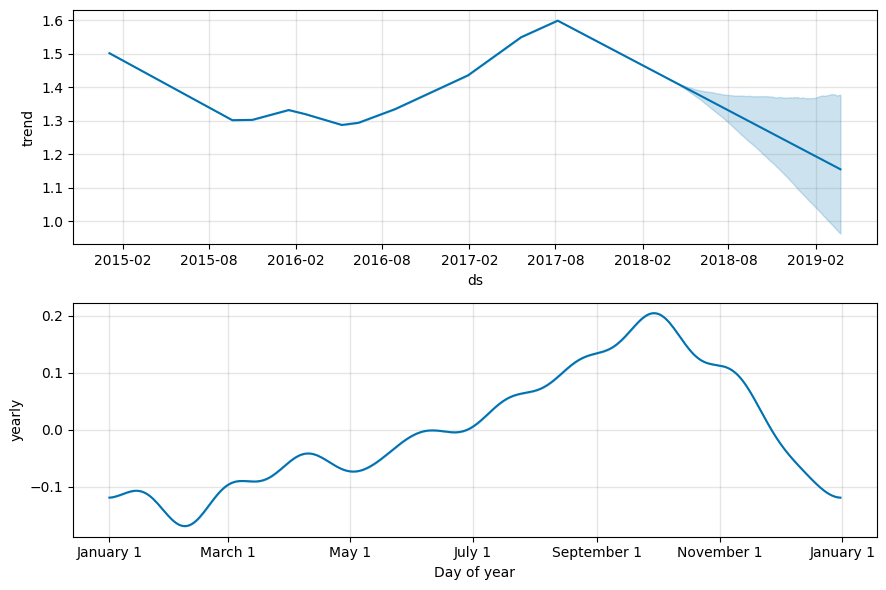

In [31]:
figure = m.plot_components(forecast)

prediction region specific

In [32]:
avocado_df_sample = avocado_df[ avocado_df['region'] == 'West' ]
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,9,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West


In [33]:
avocado_df_sample = avocado_df_sample.sort_values('Date')
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18227,2,2018-03-11,1.63,264691.87,27566.25,60383.57,276.42,176465.63,107174.93,69290.70,0.00,organic,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


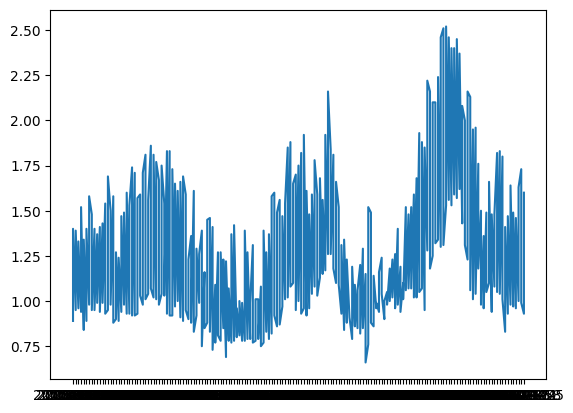

In [34]:
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [35]:
avocado_df_sample_prophet = avocado_df_sample[['Date', 'AveragePrice']]

In [36]:
avocado_df_sample_prophet

,Date,AveragePrice
2755,2015-01-04,0.89
11881,2015-01-04,1.40
2754,2015-01-11,0.95
11880,2015-01-11,1.39
2753,2015-01-18,0.96
...,...,...
18227,2018-03-11,1.63
18226,2018-03-18,1.73
9103,2018-03-18,0.99
9102,2018-03-25,0.93


In [38]:
avocado_df_sample_prophet = avocado_df_sample_prophet.rename(columns={'Date' : 'ds', 'AveragePrice' : 'y'})
avocado_df_sample_prophet

,ds,y
2755,2015-01-04,0.89
11881,2015-01-04,1.40
2754,2015-01-11,0.95
11880,2015-01-11,1.39
2753,2015-01-18,0.96
...,...,...
18227,2018-03-11,1.63
18226,2018-03-18,1.73
9103,2018-03-18,0.99
9102,2018-03-25,0.93


In [39]:
n = Prophet()

In [40]:
n.fit(avocado_df_sample_prophet)

18:39:47 - cmdstanpy - INFO - Chain [1] start processing
18:39:47 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
future = n.make_future_dataframe(periods=365)
forcast = n.predict(future)

/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 2000x1000 with 0 Axes>

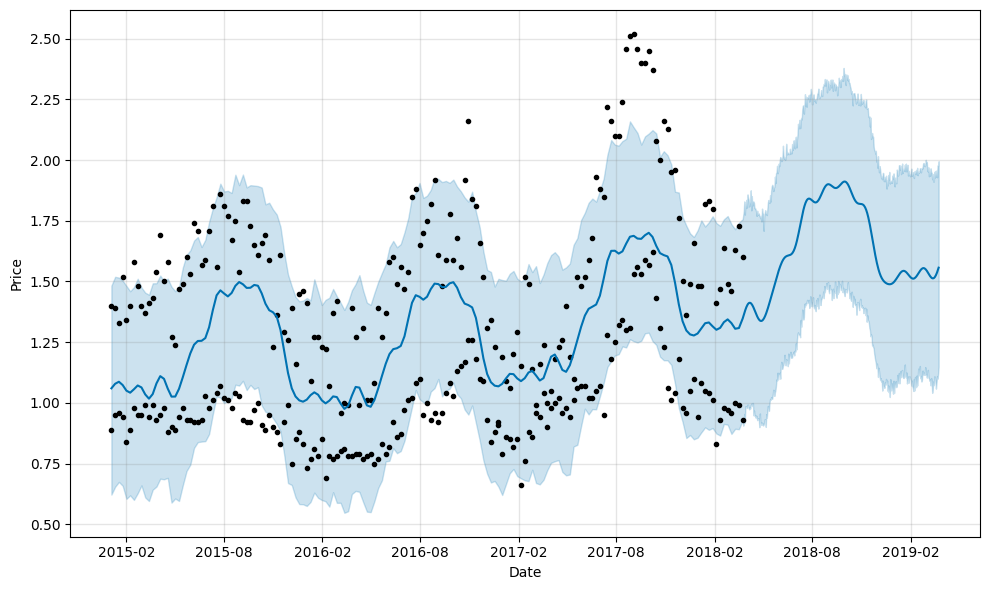

In [42]:
plt.figure(figsize=(20,10))
figure = n.plot(forcast, xlabel='Date', ylabel='Price')

/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects

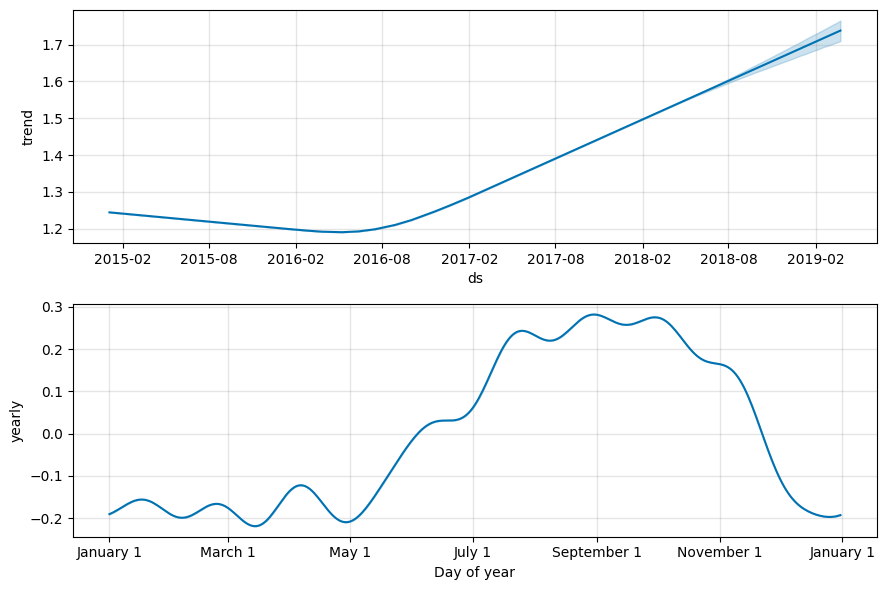

In [43]:
figure = n.plot_components(forcast)